In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
raw=pd.read_csv('../data/bsa2017_env_mod.csv')
raw


,Sserial,Sex,Age,Married,Children,Education,eq_inc_quintiles,RClassGp,CCBELIEV,carallow,...,plnuppri,Politics,Voted,actchar,actpol,govnosa2,PartyId2,leftrigh,libauth,WtFactor
0,290011,2,20,4,2,2,-1,5,-1,-1,...,-1,3,1,2,2,3,5,4.0,3.166667,2.476490
1,290012,2,22,4,2,2,-1,1,3,-1,...,-1,3,-1,-1,-1,-1,2,-1.0,-1.000000,2.240266
2,290020,2,20,4,1,3,-1,5,2,-1,...,-1,3,2,-1,-1,-1,2,-1.0,-1.000000,0.869750
3,290026,2,18,4,2,1,-1,5,3,3,...,3,2,-1,-1,-1,-1,5,2.6,3.666667,2.457092
4,290036,2,22,1,1,2,-1,5,2,2,...,3,5,-1,-1,-1,-1,5,3.0,3.000000,1.443674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,294004,2,73,1,2,1,-1,3,-1,-1,...,-1,2,1,5,5,4,1,3.0,3.166667,0.911892
3984,291432,1,999,1,1,4,-1,5,-1,-1,...,-1,5,2,-1,-1,-1,8,-1.0,-1.000000,0.762073
3985,292931,2,999,3,2,3,-1,2,1,-1,...,-1,2,1,5,5,8,1,2.4,4.500000,0.412564
3986,293532,2,999,2,2,2,-1,1,1,-1,...,-1,1,1,-1,-1,-1,2,1.4,3.166667,0.450099


In [3]:
raw.replace({'Sex':{1: 'M', 2:'F'}, }, inplace=True)
raw.replace({'Married':{1: 'Married/Living with partner', 2:'Divorced', 3:'Widowed', 4:'Never Married', 9:'Missing'}}, inplace=True)
raw.replace({'Children':{1:1, 2:0}, }, inplace=True)
raw.replace({'Education':{1:'Degree', 2:'ALevel', 3:'GCSE', 4:'None'}} , inplace=True)
raw

,Sserial,Sex,Age,Married,Children,Education,eq_inc_quintiles,RClassGp,CCBELIEV,carallow,...,plnuppri,Politics,Voted,actchar,actpol,govnosa2,PartyId2,leftrigh,libauth,WtFactor
0,290011,F,20,Never Married,0,ALevel,-1,5,-1,-1,...,-1,3,1,2,2,3,5,4.0,3.166667,2.476490
1,290012,F,22,Never Married,0,ALevel,-1,1,3,-1,...,-1,3,-1,-1,-1,-1,2,-1.0,-1.000000,2.240266
2,290020,F,20,Never Married,1,GCSE,-1,5,2,-1,...,-1,3,2,-1,-1,-1,2,-1.0,-1.000000,0.869750
3,290026,F,18,Never Married,0,Degree,-1,5,3,3,...,3,2,-1,-1,-1,-1,5,2.6,3.666667,2.457092
4,290036,F,22,Married/Living with partner,1,ALevel,-1,5,2,2,...,3,5,-1,-1,-1,-1,5,3.0,3.000000,1.443674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,294004,F,73,Married/Living with partner,0,Degree,-1,3,-1,-1,...,-1,2,1,5,5,4,1,3.0,3.166667,0.911892
3984,291432,M,999,Married/Living with partner,1,None,-1,5,-1,-1,...,-1,5,2,-1,-1,-1,8,-1.0,-1.000000,0.762073
3985,292931,F,999,Widowed,0,GCSE,-1,2,1,-1,...,-1,2,1,5,5,8,1,2.4,4.500000,0.412564
3986,293532,F,999,Divorced,0,ALevel,-1,1,1,-1,...,-1,1,1,-1,-1,-1,2,1.4,3.166667,0.450099


/Users/joreilly/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


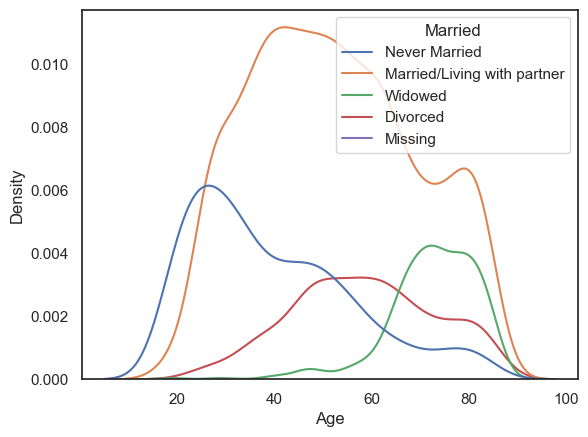

In [4]:
raw.replace({'Age':{999:np.nan}} , inplace=True)
sns.kdeplot(data=raw,x='Age',hue='Married')
plt.show()


(1.0, 5.0)

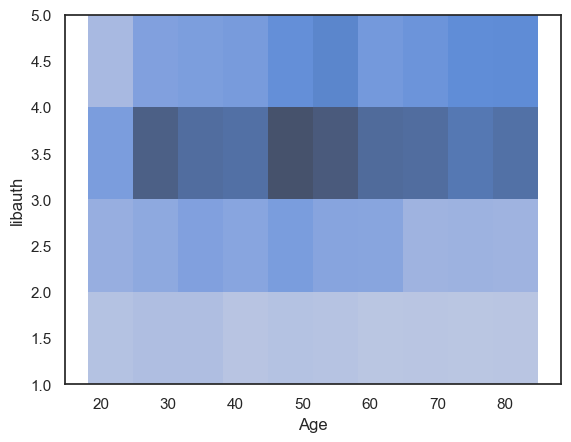

In [5]:
sns.histplot(data=raw, x='Age', y='libauth', bins=10)
plt.ylim(1,5)

<AxesSubplot:xlabel='Age', ylabel='leftrigh'>

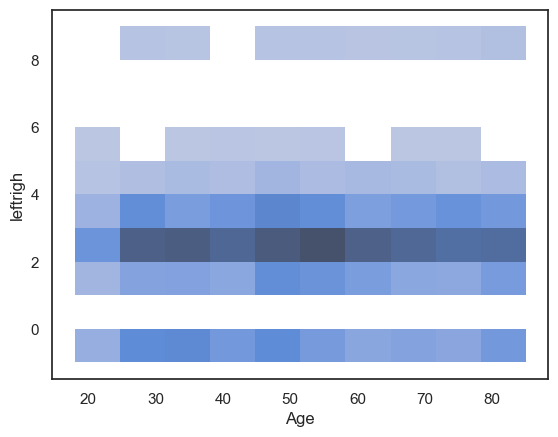

In [6]:
sns.histplot(data=raw, x='Age', y='leftrigh', bins=10)


<AxesSubplot:xlabel='leftrigh', ylabel='Density'>

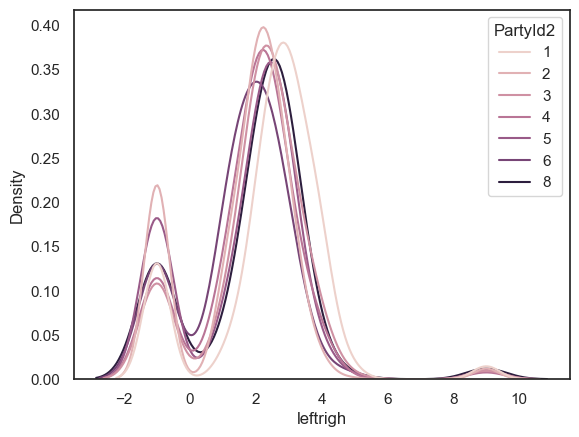

In [11]:
sns.kdeplot(data=raw, x='leftrigh', hue='PartyId2', common_norm=False)